In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
samples = ["CX113C","CX113E","CX113F","CX113H","CX115H","CX1138","Neige_2_3","Neige_3_2","Neige_4", "greek_wolf", "slov_bear", "human"]
taxa = ["Bear", "Bear", "Wolf", "Wolf", "Bear", "Bear", "Wolf", "Wolf", "Wolf", "Wolf", "Bear", "human"]
lims_all = [20,20,20,20,20,20,90,20,20,100,100, 100]
lims_min = [1,2,1,0.5,0.5,5,100,0.5,0.5,100,100, 100]

In [6]:
for i in range(len(samples)):
    df = pd.read_csv(f"./3ref_data/{samples[i]}.comp3.cov.tsv", sep='\t', header=0)
    dog =  df[df["#rname"].str.contains("dog")].sort_values(by="endpos", ascending=False)
    bear = df[df["#rname"].str.contains("bear")].sort_values(by="endpos", ascending=False)
    human = df[df["#rname"].str.contains("human")].sort_values(by="endpos", ascending=False)
    
    df2 = pd.read_csv(f"./3ref_data/{samples[i]}.comp3.minq.tsv", sep='\t', header=0)
    dog_min =  df2[df2["#rname"].str.contains("dog")].sort_values(by="endpos", ascending=False)
    bear_min = df2[df2["#rname"].str.contains("bear")].sort_values(by="endpos", ascending=False)
    human_min = df2[df2["#rname"].str.contains("human")].sort_values(by="endpos", ascending=False)

    dog = dog[0:100]
    dog['species'] = 'dog'
    bear = bear[0:100]
    bear['species'] = 'bear'
    human = human[0:100]
    human['species'] = 'human'

    dog_min = dog_min[0:100]
    dog_min['species'] = 'dog'
    bear_min = bear_min[0:100]
    bear_min['species'] = 'bear'
    human_min = human_min[0:100]
    human_min['species'] = 'human'

    df_all = pd.concat([dog, bear, human])
    df_min = pd.concat([dog_min, bear_min, human_min])

    # Set bar width
    bar_width = 1

    # Set positions for bars
    x = np.arange(300)
    # Create the figure and axis
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Set colors based on species
    colors_all = df_all['species'].map({'dog': 'b', 'bear': 'r', 'human': 'g'})
    colors_min = df_min['species'].map({'dog': 'b', 'bear': 'r', 'human': 'g'})

    # Plot bars with colors
    axes[0].bar(x, df_all['coverage'], width=bar_width, label='All reads', color=colors_all, alpha=0.7)
    axes[1].bar(x, df_min['coverage'], width=bar_width, label='min MAPQ 30', color=colors_min, alpha=0.7)

    # Set labels and title
    axes[0].set_xticks([])
    axes[0].set_xticklabels("")
    axes[0].set_ylabel('Percent Coverage')
    axes[0].set_xlabel('Contig')
    axes[0].set_title('All reads')
    axes[0].set_ylim(0, lims_all[i])

    axes[1].set_xticks([])
    axes[1].set_xticklabels("")
    axes[1].set_ylabel('')
    axes[1].set_xlabel('Contig')
    axes[1].set_title('Min MAPQ 30')
    axes[1].set_ylim(0, lims_all[i])

    axes[0].margins(x=0.01)
    axes[1].margins(x=0.01)
    fig.suptitle(f"Sample: {samples[i]}, Species: {taxa[i]}", fontsize=14)
    
    # Add legend
    handles = [plt.Line2D([0], [0], color='b', lw=8, label='Dog'),
               plt.Line2D([0], [0], color='r', lw=8, label='Bear'),
               plt.Line2D([0], [0], color='g', lw=8, label='Human')]
    fig.legend(handles=handles, loc='upper right', bbox_to_anchor=(1, 1.02))
    

    # Show the plot
    plt.tight_layout()
    plt.savefig(f"./figures/comp3/{samples[i]}_pc_cov.png", dpi=600)
    plt.close()

In [28]:
for i in range(len(samples)):
    df = pd.read_csv(f"./3ref_data/{samples[i]}.comp3.cov.tsv", sep='\t', header=0)
    dog =  df[df["#rname"].str.contains("dog")].sort_values(by="endpos", ascending=False)
    bear = df[df["#rname"].str.contains("bear")].sort_values(by="endpos", ascending=False)
    human = df[df["#rname"].str.contains("human")].sort_values(by="endpos", ascending=False)
    
    df2 = pd.read_csv(f"./3ref_data/{samples[i]}.comp3.minq.tsv", sep='\t', header=0)
    dog_min =  df2[df2["#rname"].str.contains("dog")].sort_values(by="endpos", ascending=False)
    bear_min = df2[df2["#rname"].str.contains("bear")].sort_values(by="endpos", ascending=False)
    human_min = df2[df2["#rname"].str.contains("human")].sort_values(by="endpos", ascending=False)

    # Set bar width
    bar_width = 0.8

    # Set positions for bars
    x = np.arange(100)
    # Create the figure and axis
    fig, axes = plt.subplots(2, 3, figsize=(10, 8))

    # Plot bars
    axes[0,0].bar(x, dog['coverage'][0:100], width=bar_width, label='Dog', alpha=0.7, color='b')
    axes[0,1].bar(x, bear['coverage'][0:100], width=bar_width, label='bear', alpha=0.7, color='r')
    axes[0,2].bar(x, human['coverage'][0:100], width=bar_width, label='human', alpha=0.7, color='g')
    axes[1,0].bar(x, dog_min['coverage'][0:100], width=bar_width, label='Dog', alpha=0.7, color='b')
    axes[1,1].bar(x, bear_min['coverage'][0:100], width=bar_width, label='Bear', alpha=0.7, color='r')
    axes[1,2].bar(x, human_min['coverage'][0:100], width=bar_width, label='Human', alpha=0.7, color='g')

    # Set labels and title
    axes[0,0].set_xticks([])
    axes[0,0].set_xticklabels("")
    axes[0,0].set_ylabel('Percent Coverage')
    axes[0,0].set_xlabel('Contig #')
    axes[0,0].set_title('all reads to dog')
    axes[0,0].set_ylim(0, lims_all[i])

    axes[0,1].set_xticks([])
    axes[0,1].set_xticklabels("")
    axes[0,1].set_ylabel('')
    axes[0,1].set_xlabel('Contig #')
    axes[0,1].set_title('all reads to bear')
    axes[0,1].set_ylim(0, lims_all[i])

    axes[0,2].set_xticks([])
    axes[0,2].set_xticklabels("")
    axes[0,2].set_ylabel('')
    axes[0,2].set_xlabel('Contig #')
    axes[0,2].set_title('all reads to human')
    axes[0,2].set_ylim(0, lims_all[i])

    # Set labels and title
    axes[1,0].set_xticks([])
    axes[1,0].set_xticklabels("")
    axes[1,0].set_ylabel('Percent Coverage')
    axes[1,0].set_xlabel('Contig #')
    axes[1,0].set_title('30 minQ to dog')
    axes[1,0].set_ylim(0, lims_min[i])

    axes[1,1].set_xticks([])
    axes[1,1].set_xticklabels("")
    axes[1,1].set_ylabel('')
    axes[1,1].set_xlabel('Contig #')
    axes[1,1].set_title('30 minQ to bear')
    axes[1,1].set_ylim(0, lims_min[i])

    axes[1,2].set_xticks([])
    axes[1,2].set_xticklabels("")
    axes[1,2].set_ylabel('')
    axes[1,2].set_xlabel('Contig #')
    axes[1,2].set_title('30 minQ to human')
    axes[1,2].set_ylim(0, lims_min[i])
    fig.suptitle(f"Sample: {samples[i]}, Species: {taxa[i]}", fontsize=14)
    
    # Show the plot
    plt.tight_layout()
    plt.savefig(f"./figures/comp3/{samples[i]}_pc_cov.png", dpi=600)
    plt.close()

In [27]:
### total reads dict
nreads = {
"CX113C" : 100561512,
"CX113E" : 144778271,
"CX113F" : 86261578,
"CX113H" : 75801442,
"CX115H" : 120629800,
"CX1138" : 133753417,
"Neige_2_3" : 89823533,
"Neige_3_2" : 105035879,
"Neige_4" : 113481500,
"greek_wolf" : 410942837,
"slov_bear" : 198464348,
"human" : 75842697}

ndups = {
"CX113C" : 2472699,
"CX113E" : 4413344,
"CX113F" : 2115773,
"CX113H" : 2042822,
"CX115H" : 3032773,
"CX1138" : 4307403,
"Neige_2_3" : 5705317,
"Neige_3_2" : 2304170,
"Neige_4" : 2991338,
"greek_wolf" : 80002110,
"slov_bear" : 4157923,
"human" : 9698347}

In [78]:
stats_df = pd.DataFrame(columns=["Sample", "Species", "Total reads", "% duplicates", "% mapped dog", "% mapped bear", "% mapped human", "% unmapped", "% mapped dog 30MAPQ", "% mapped bear 30MAPQ", "% mapped human 30MAPQ", "% unmapped 30MINQ"])


for i in range(len(samples)):
    df = pd.read_csv(f"./3ref_data/{samples[i]}.comp3.cov.tsv", sep='\t', header=0)
    dog =  df[df["#rname"].str.contains("dog")].sort_values(by="endpos", ascending=False)
    bear = df[df["#rname"].str.contains("bear")].sort_values(by="endpos", ascending=False)
    human = df[df["#rname"].str.contains("human")].sort_values(by="endpos", ascending=False)
    
    df2 = pd.read_csv(f"./3ref_data/{samples[i]}.comp3.minq.tsv", sep='\t', header=0)
    dog_min =  df2[df2["#rname"].str.contains("dog")].sort_values(by="endpos", ascending=False)
    bear_min = df2[df2["#rname"].str.contains("bear")].sort_values(by="endpos", ascending=False)
    human_min = df2[df2["#rname"].str.contains("human")].sort_values(by="endpos", ascending=False)

    stats_df = pd.concat([stats_df, pd.DataFrame([{"Sample": samples[i], "Species": taxa[i], "Total reads": nreads[samples[i]], "% duplicates": ndups[samples[i]]/nreads[samples[i]]*100, "% mapped dog": dog['numreads'].sum()/nreads[samples[i]]*100, "% mapped bear": bear['numreads'].sum()/nreads[samples[i]]*100, "% mapped human": human['numreads'].sum()/nreads[samples[i]]*100, "% unmapped": 100-(dog['numreads'].sum()/nreads[samples[i]]*100 + bear['numreads'].sum()/nreads[samples[i]]*100 + human['numreads'].sum()/nreads[samples[i]]*100 + ndups[samples[i]]/nreads[samples[i]]*100), "% mapped dog 30MAPQ": dog_min['numreads'].sum()/nreads[samples[i]]*100, "% mapped bear 30MAPQ": bear_min['numreads'].sum()/nreads[samples[i]]*100, "% mapped human 30MAPQ": human_min['numreads'].sum()/nreads[samples[i]]*100, "% unmapped 30MINQ": 100-(dog_min['numreads'].sum()/nreads[samples[i]]*100 + bear_min['numreads'].sum()/nreads[samples[i]]*100 + human_min['numreads'].sum()/nreads[samples[i]]*100 + ndups[samples[i]]/nreads[samples[i]]*100)}])], ignore_index=True)

stats_df

/var/folders/s1/69b8m12j0p5g52bl5hqkl0040000gn/T/ipykernel_6762/4265275875.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_df = pd.concat([stats_df, pd.DataFrame([{"Sample": samples[i], "Species": taxa[i], "Total reads": nreads[samples[i]], "% duplicates": ndups[samples[i]]/nreads[samples[i]]*100, "% mapped dog": dog['numreads'].sum()/nreads[samples[i]]*100, "% mapped bear": bear['numreads'].sum()/nreads[samples[i]]*100, "% mapped human": human['numreads'].sum()/nreads[samples[i]]*100, "% unmapped": 100-(dog['numreads'].sum()/nreads[samples[i]]*100 + bear['numreads'].sum()/nreads[samples[i]]*100 + human['numreads'].sum()/nreads[samples[i]]*100 + ndups[samples[i]]/nreads[samples[i]]*100), "% mapped dog 30MAPQ": dog_min['numreads']

,Sample,Species,Total reads,% duplicates,% mapped dog,% mapped bear,% mapped human,% unmapped,% mapped dog 30MAPQ,% mapped bear 30MAPQ,% mapped human 30MAPQ,% unmapped 30MINQ
0,CX113C,Bear,100561512,2.458892,29.488200,30.102320,30.914474,7.036114,0.143944,0.270317,0.130371,96.996476
1,CX113E,Bear,144778271,3.048347,29.532423,29.795102,32.159340,5.464789,0.208908,0.368126,0.185490,96.189128
2,CX113F,Wolf,86261578,2.452741,29.589667,30.139879,30.322564,7.495149,0.218795,0.139202,0.120399,97.068863
3,CX113H,Wolf,75801442,2.694965,29.101589,30.061109,28.879738,9.262600,0.086911,0.084823,0.070991,97.062311
4,CX115H,Bear,120629800,2.514116,29.804463,30.095247,31.343256,6.242918,0.265380,0.287805,0.233984,96.698715
5,CX1138,Bear,133753417,3.220406,29.231969,30.097950,30.971002,6.478674,0.245980,0.695602,0.243767,95.594245
6,Neige_2_3,Wolf,89823533,6.351695,53.118561,18.340131,19.763067,2.426546,32.180512,0.085581,0.021925,61.360286
7,Neige_3_2,Wolf,105035879,2.193698,29.684763,30.127948,32.214472,5.779119,0.159174,0.119557,0.101916,97.425655
8,Neige_4,Wolf,113481500,2.635970,29.433109,30.144778,31.639604,6.146539,0.125448,0.117621,0.103204,97.017757
9,greek_wolf,Wolf,410942837,19.467941,76.960437,1.985952,1.583347,0.002323,69.790928,0.119595,0.010243,10.611293


In [79]:
# Format the values in the table to 2 decimal places apart from the first three columns
table_df = stats_df
table_df.iloc[:, 3:] = table_df.iloc[:, 3:].applymap(lambda x: f"{x:.2f}")
# Convert "Total reads" to units of 1x10^7
table_df["Total reads"] = table_df["Total reads"].astype(float) / 1e7
# Rename the "Total reads" column to "Total reads x10e7"
table_df.rename(columns={"Total reads": "Total reads x10e7"}, inplace=True)
# Format the "Total reads x10^7" column to 2 decimal places
table_df["Total reads x10e7"] = table_df["Total reads x10e7"].apply(lambda x: f"{x:.2f}")
table_df.columns = ["Sample", "Species", "Total \n reads \n x10e7", "% \n duplicates", "% mapped \n dog", "% mapped \n bear", "% mapped \n human", "% \n unmapped", "% mapped \n dog \n 30MAPQ", "% mapped \n bear \n 30MAPQ", "% mapped \n human \n 30MAPQ", "% \n unmapped \n 30MINQ"]

/var/folders/s1/69b8m12j0p5g52bl5hqkl0040000gn/T/ipykernel_6762/117438451.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  table_df.iloc[:, 3:] = table_df.iloc[:, 3:].applymap(lambda x: f"{x:.2f}")
/var/folders/s1/69b8m12j0p5g52bl5hqkl0040000gn/T/ipykernel_6762/117438451.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      2.46
1      3.05
2      2.45
3      2.69
4      2.51
5      3.22
6      6.35
7      2.19
8      2.64
9     19.47
10     2.10
11    12.79
Name: % duplicates, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_df.iloc[:, 3:] = table_df.iloc[:, 3:].applymap(lambda x: f"{x:.2f}")
/var/folders/s1/69b8m12j0p5g52bl5hqkl0040000gn/T/ipykernel_6762/117438451.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     29.49
1     29

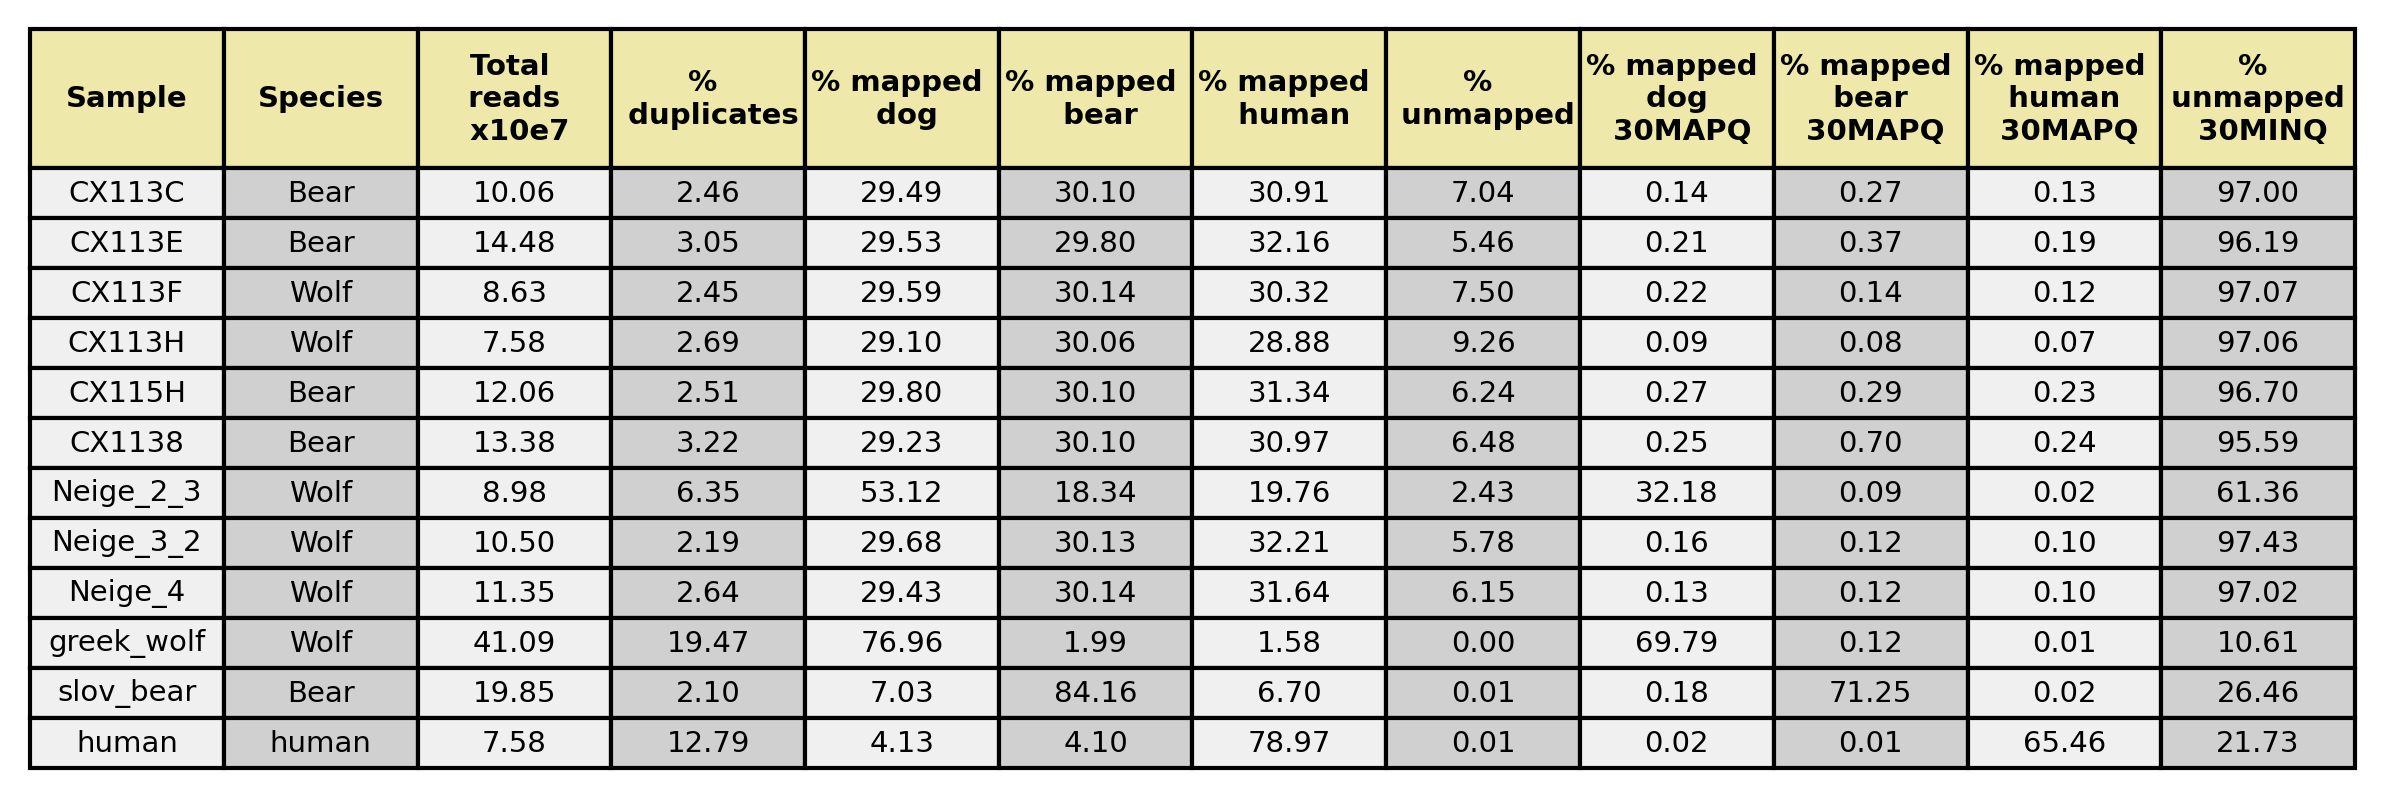

In [91]:
#### visualise table
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 2), dpi=300)  # High resolution
ax.set_frame_on(False)  # Remove the figure frame
ax.xaxis.set_visible(False)  # Hide x-axis
ax.yaxis.set_visible(False)  # Hide y-axis

# Create a table
table = ax.table(
    cellText=table_df.values,
    colLabels=table_df.columns,
    cellLoc='center',
    loc='center',
    colColours=["palegoldenrod"] * table_df.shape[1]  # Header background color
)

# Format the table
table.auto_set_font_size(False)
table.set_fontsize(7)
table.auto_set_column_width(15)  # Adjust column width

# Make headers bold
for i in range(len(table_df.columns)):
    cell = table[0, i]
    cell.set_text_props(weight='bold')
    cell = table[0, i]
    cell.set_text_props(weight='bold')
    cell.set_height(0.3)  # Increase the height of the header row

# Alternate column colors
for col in range(table_df.shape[1]):  # Loop through columns
    color = '#f0f0f0' if col % 2 == 0 else '#d0d0d0'  # Alternating greys
    for row in range(1, table_df.shape[0] + 1):  # +1 to include headers
        cell = table[(row, col)]
        cell.set_facecolor(color)

# Save as high-quality image
plt.savefig("./figures/comp3/stats_table.png", bbox_inches="tight", dpi=300)
plt.show()